In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier   
from sklearn.ensemble import AdaBoostClassifier,gradient_boosting
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [79]:
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [80]:
df.drop('Unnamed: 0',inplace=True,axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [81]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [82]:
df.shape

(18249, 13)

In [83]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [84]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [85]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [86]:
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

 Both type of avocado is present almost in same amount in the data set.

In [87]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


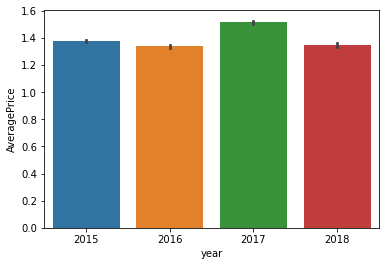

In [88]:
#checking ratio of year and price 
sns.barplot(x='year',y='AveragePrice',data=df)

We could observe that in year 2017 the price of avocados are maximum compare to others

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210E855C520>,
      dtype=object)

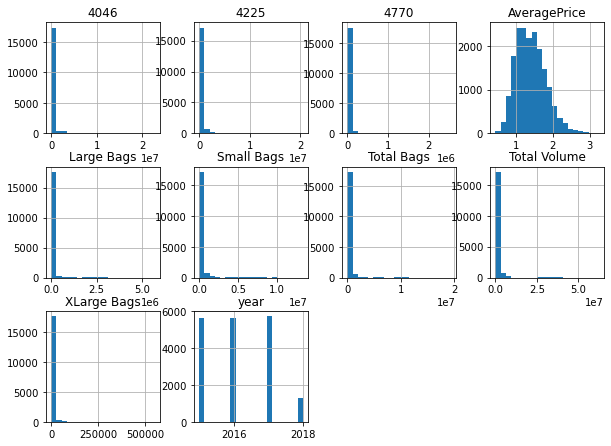

In [89]:
#Plotting histogram to check the skewness of the data
df.hist(figsize=(10,10),grid=True,layout=(4,4),bins=20)

Average price column is normally distributing over the histogram.
Rest of the data almost left skewed data

In [90]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [91]:
#making the skewness less than or equal to 0.5 for better prediction and to get normal distribution graph
skew=('4046','4225','4770','Large Bags','Small Bags','Total Bags','Total Volume','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.5:
        df[col]=np.log1p(df[col])

In [92]:
#Transform non-numerical into numerical columns
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

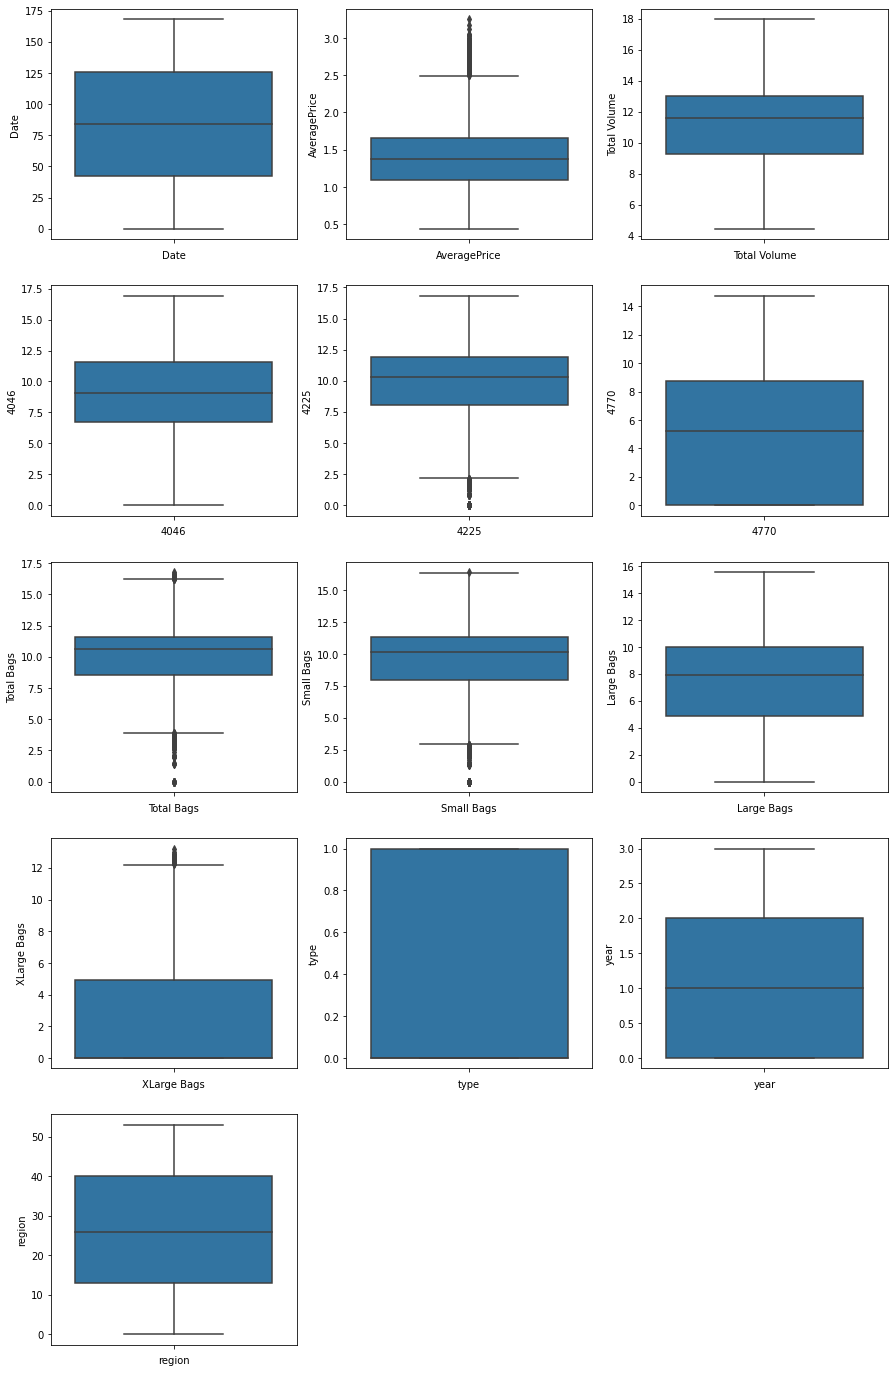

In [93]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [94]:
df.shape

(18249, 13)

In [95]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['AveragePrice','4225','Total Bags','Small Bags','XLarge Bags']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

In [96]:
df.shape

(17834, 13)

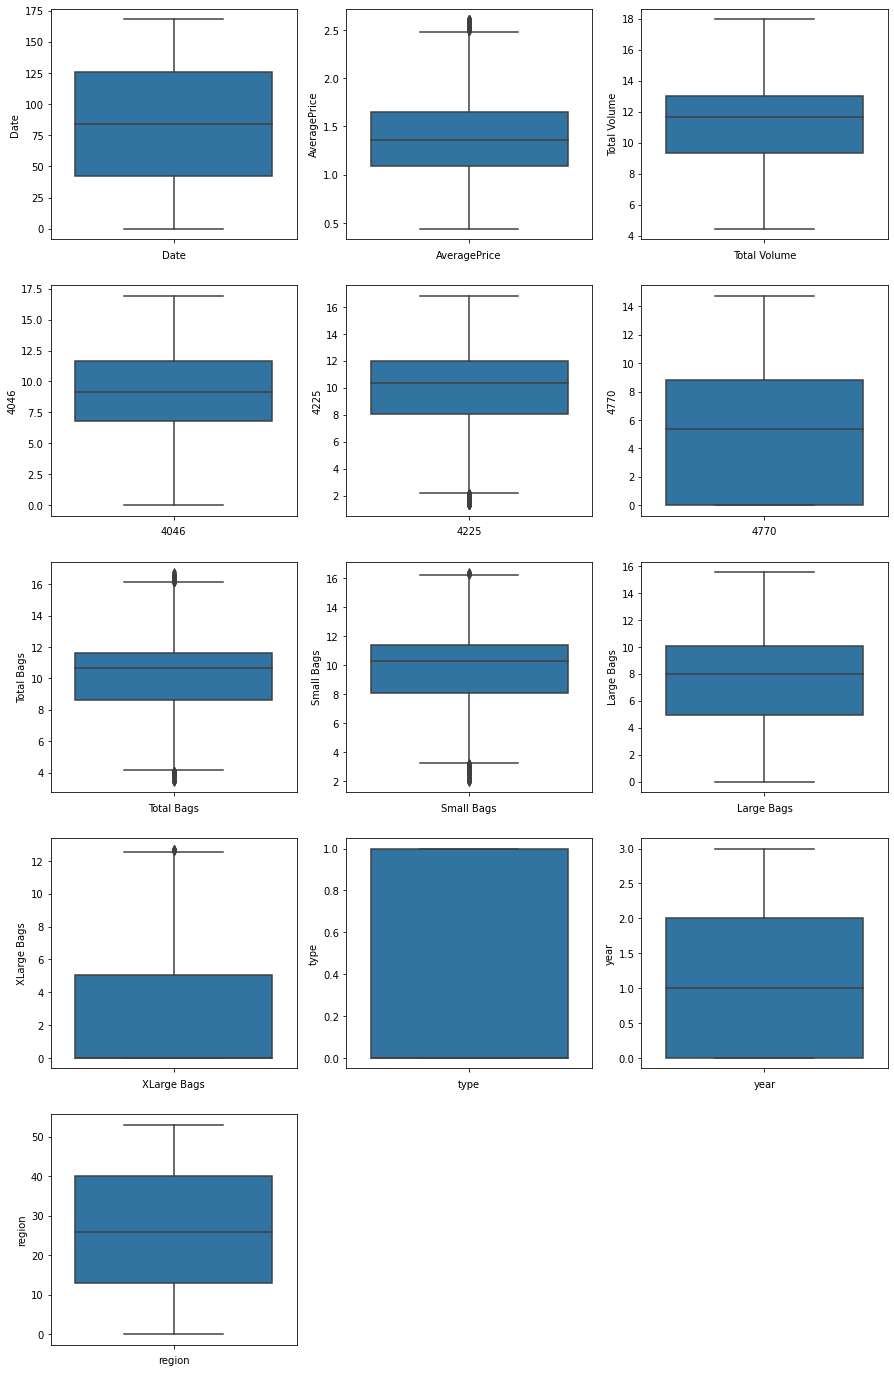

In [97]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [98]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['AveragePrice','4225','Total Bags','Small Bags']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

In [99]:
df.shape

(17742, 13)

In [100]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['AveragePrice','4225','Total Bags','Small Bags']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

In [101]:
df.shape

(17712, 13)

In [102]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.142699,0.071764,0.000134,-0.000573,-0.058612,0.206204,0.181085,0.184878,0.168074,0.006500,0.950081,0.008010
AveragePrice,0.142699,1.000000,-0.587713,-0.553867,-0.462213,-0.505991,-0.574022,-0.496520,-0.486954,-0.379802,0.619483,0.093109,-0.034165
Total Volume,0.071764,-0.587713,1.000000,0.886058,0.915505,0.830801,0.948358,0.915821,0.672651,0.658385,-0.792826,0.079973,0.127065
4046,0.000134,-0.553867,0.886058,1.000000,0.765379,0.746008,0.801549,0.783023,0.585707,0.582834,-0.718807,0.008030,0.202680
4225,-0.000573,-0.462213,0.915505,0.765379,1.000000,0.799940,0.815074,0.776283,0.618673,0.593788,-0.742023,0.007687,0.085639
4770,-0.058612,-0.505991,0.830801,0.746008,0.799940,1.000000,0.775053,0.770838,0.554942,0.638549,-0.776887,-0.051927,0.085357
Total Bags,0.206204,-0.574022,0.948358,0.801549,0.815074,0.775053,1.000000,0.950086,0.713183,0.638446,-0.724281,0.210084,0.134994
Small Bags,0.181085,-0.496520,0.915821,0.783023,0.776283,0.770838,0.950086,1.000000,0.555658,0.623135,-0.725459,0.183275,0.121614
Large Bags,0.184878,-0.486954,0.672651,0.585707,0.618673,0.554942,0.713183,0.555658,1.000000,0.466204,-0.495681,0.189423,0.126532
XLarge Bags,0.168074,-0.379802,0.658385,0.582834,0.593788,0.638549,0.638446,0.623135,0.466204,1.000000,-0.623912,0.165514,0.023307


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

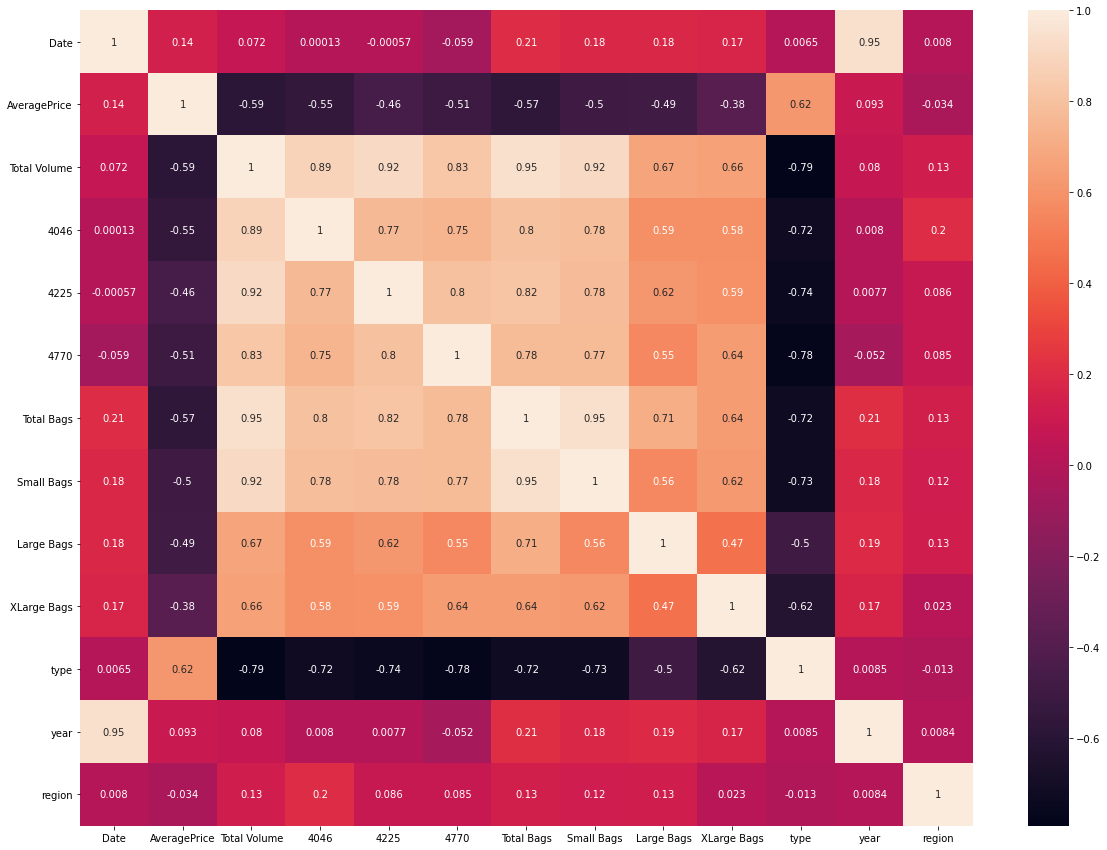

In [103]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.plot

In [104]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0
1,50,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0
2,49,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0
3,48,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0
4,47,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,3,53
18245,160,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,3,53
18246,159,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,3,53
18247,158,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,3,53


## Predicting Region of Avocado

In [105]:
x_c=df.drop(columns=['region','Date'])
y_c=df[["region"]]
print(x_c.shape)
print(y_c.shape)

(17712, 11)
(17712, 1)


In [106]:
sc=StandardScaler()
sc.fit_transform(x_c)
x_c=pd.DataFrame(x_c,columns=x_c.columns)

In [107]:
model=[DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score=0
for r_state in range(40,90):
    train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=r_state,test_size=0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c=i_c.predict(test_xc)
        ac_score=accuracy_score(test_yc,pre_c)
        print("accuracy on basis of random state ",r_state,"is",ac_score)
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c
print("----------------")
print("max accuracy on basis of random state ",final_state,"is",max_accuracy_score,"and model is",final_model)

accuracy on basis of random state  40 is 0.7846022241231823
accuracy on basis of random state  40 is 0.8491017964071856
accuracy on basis of random state  41 is 0.7822070145423439
accuracy on basis of random state  41 is 0.829940119760479
accuracy on basis of random state  42 is 0.7895637296834902
accuracy on basis of random state  42 is 0.8424294268605645
accuracy on basis of random state  43 is 0.7868263473053893
accuracy on basis of random state  43 is 0.8378100940975193
accuracy on basis of random state  44 is 0.7804961505560308
accuracy on basis of random state  44 is 0.8472198460222412
accuracy on basis of random state  45 is 0.7875106928999145
accuracy on basis of random state  45 is 0.8434559452523525
accuracy on basis of random state  46 is 0.790076988879384
accuracy on basis of random state  46 is 0.8419161676646707
accuracy on basis of random state  47 is 0.7965782720273739
accuracy on basis of random state  47 is 0.8470487596236099
accuracy on basis of random state  48 is 0

In [108]:
#Checking the best parameter for prediction of KNeighborsClassifier using GridSearchCV
train_xc,test_xc,train_yc,test_yc=train_test_split(x_c,y_c,random_state=72,test_size=0.33)
KNC=KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [109]:
KNC=KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc=KNC.predict(test_xc)
acu_score=accuracy_score(test_yc,predc)
print("Accuracy score:",acu_score*100)

Accuracy score: 87.44225834046193


In [110]:
#Calculating the scores of different parameters
score=cross_val_score(KNC,x_c,y_c,cv=100,scoring='accuracy').mean()
print("Cross_val_score : ",score*100)
print('Mean Score : ',score.mean()*100)
print('STD score : ',score.std())

Cross_val_score :  85.76880594172538
Mean Score :  85.76880594172538
STD score :  0.0


Accuracy is improved by 2%

Roc Curve

In [111]:
pred_prob=KNC.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
fpr,tpr,thresholds=roc_curve(test_yc,pred_prob,pos_label=True)

In [113]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.00470138 1.        ]


[0.         0.82352941 1.        ]


[2. 1. 0.]


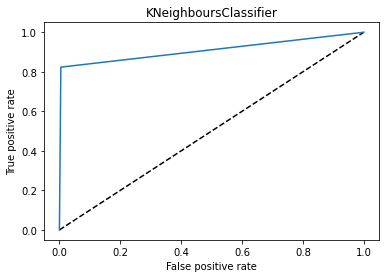

In [114]:
#Plotting the graph which tells us about the area under curve,more the area under curve more willbe the better prediction
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighbourClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighboursClassifier')
plt.show()

## Predicting Average Price of Avocado

In [115]:
x=df.drop(columns=['AveragePrice','Date'])
y=df[["AveragePrice"]]
print(x.shape)
print(y.shape)

(17712, 11)
(17712, 1)


In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score=0
for r_state in range(75,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        r2_sc=r2_score(test_y,pre)
        print("R2 score on basis of random state ",r_state,"is",r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
print("----------------")
print("max accuracy on basis of random state ",final_state,"is",max_r2_score,"and model is",final_model)

R2 score on basis of random state  75 is 0.6682288018128771
R2 score on basis of random state  75 is 0.8213750651304655
R2 score on basis of random state  75 is 0.5187413553763229
R2 score on basis of random state  75 is 0.5379251316566543
R2 score on basis of random state  75 is 0.6779895844376542
R2 score on basis of random state  76 is 0.686173311401941
R2 score on basis of random state  76 is 0.8229196009303598
R2 score on basis of random state  76 is 0.4766351885015436
R2 score on basis of random state  76 is 0.5338779875088909
R2 score on basis of random state  76 is 0.6790803327010515
R2 score on basis of random state  77 is 0.6687856850629454
R2 score on basis of random state  77 is 0.8229149062013713
R2 score on basis of random state  77 is 0.49447433170314326
R2 score on basis of random state  77 is 0.5394187498290361
R2 score on basis of random state  77 is 0.6761467510925625
R2 score on basis of random state  78 is 0.6725835672018528
R2 score on basis of random state  78 is

In [117]:
#Checking the best parameter for prediction of KNeighborsRegressor using GridSearchCV
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=82,test_size=0.33)
KN=KNeighborsRegressor()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KN,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

{'n_neighbors': 3}

In [118]:
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred=KNN.predict(test_x)
r2_sc=r2_score(test_y,pred)
print("Accuracy score:",r2_sc*100)

Accuracy score: 82.83355817726734


In [119]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(test_y,pred))
print('Mean Square Error:',mean_squared_error(test_y,pred))
print('Root Mean Absolute Error:',np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error: 0.10981266039349873
Mean Square Error: 0.024900141146278865
Root Mean Absolute Error: 0.3313799336011442


Text(0, 0.5, 'Predicted_y')

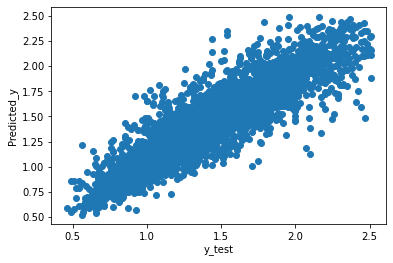

In [120]:
#Checking difference between actual and predicted values
plt.scatter(x=test_y,y=pred)
plt.xlabel('y_test')
plt.ylabel('Predicted_y')

In [121]:
import pickle
KNC=KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
pickle.dump(KNC, open('avocado_region.pkl','wb'))

In [122]:
# Loading model to compare the results
loaded = pickle.load(open('avocado_region.pkl','rb'))

In [123]:
predc=KNC.predict(test_xc)
predc

array([18, 53, 34, ..., 13, 46,  4])

In [124]:
import pickle
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pickle.dump(KNN, open('avocado_AveragePrice.pkl','wb'))

In [125]:
# Loading model to compare the results
loaded = pickle.load(open('avocado_AveragePrice.pkl','rb'))

In [126]:
pred=KNN.predict(test_x)
pred

array([[1.405],
       [0.955],
       [1.14 ],
       ...,
       [0.84 ],
       [1.015],
       [1.38 ]])